# High resolution mass spectrometry 

> Behind the decimal point 

Given our ability to create high precision *m/z* values by time averaged centroiding, we should now be able to derive statistics and deduce the elemental composition of different ions in our data.     

In [ ]:
from kendrick import read_mzml, histogram, get_time_averaged_centroids 

In [ ]:
mzml_file = '/home/frank/Work/DATA/kendrick-data/Ref0443_casein_asap01.mzML' # TODO: create download function 
df_pos, df_min = read_mzml(mzml_file)

mz_hist = histogram(df_pos)
mz_centroids = get_time_averaged_centroids(mz_hist)

In [ ]:
mz_x, mz_y = mz_centroids.T

Let's start by plotting this. 

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 

In [ ]:
%matplotlib widget

<matplotlib.collections.LineCollection>

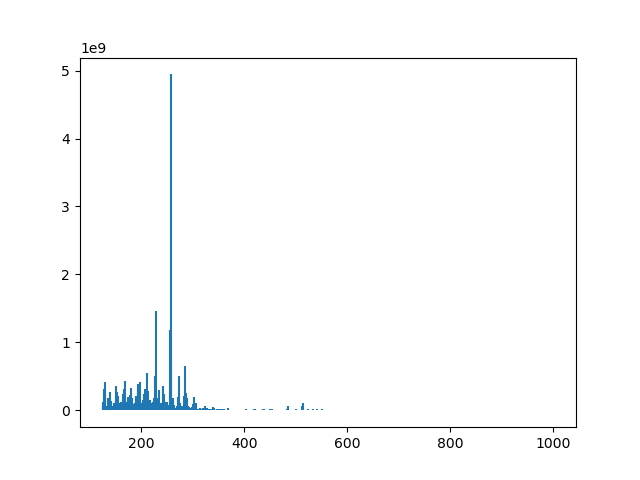

In [ ]:
fig, ax = plt.subplots()
ax.vlines(mz_x, ymin=np.zeros_like(mz_x), ymax=mz_y)

In [ ]:
idxs = np.argsort(mz_y)[::-1]

In [ ]:
mz_sorted = mz_centroids[idxs]

In [ ]:
mz_sorted

array([[2.57247150e+02, 4.94319338e+09],
       [2.29216050e+02, 1.46894206e+09],
       [2.55233050e+02, 1.17589672e+09],
       ...,
       [1.60306550e+02, 4.08524079e+03],
       [1.48418350e+02, 4.08524079e+03],
       [1.31345550e+02, 4.08524079e+03]])

For now let's pick the 10th mz value...  

In [ ]:
mz10 = mz_sorted[10][0]

In [ ]:
mz10

197.12845

Can we use `molmass` or `pyopenms` to deduce the elemental composition? 

In [ ]:
import molmass as mm

This is the latest version 

In [ ]:
mm.__version__

'2023.8.30'

In [ ]:
f = mm.Formula('CH2')

In [ ]:
f.spectrum().dataframe()

,Relative mass,Fraction,Intensity %,m/z
Mass number,,,,
14,14.015650,9.890725e-01,1.000000e+02,14.015650
15,15.019066,1.092505e-02,1.104575e+00,15.019066
16,16.025297,2.473800e-06,2.501132e-04,16.025297
17,17.031558,1.415075e-10,1.430709e-08,17.031558


Let's generate a bunch of elemental compositions... 

In [ ]:
import numpy as np

In [ ]:
positions = np.indices([2, 2, 2]).T.reshape(-1, 3)
positions

array([[0, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [1, 1, 0],
       [0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 1]])

In [ ]:
def formula(pos):  
    n1, n2, n3 = pos 
    formula_str = 'C'

In [ ]:
formula_list = [] 
elements = ['C', 'H', 'O']
for p in positions: 
    formula = ''
    for i, n in enumerate(p): 
        if n == 0: 
            elem_str = ''
        elif n == 1: 
            elem_str = elements[i]
        else: 
            elem_str = f'{elements[i]}{n}'
        formula = formula + elem_str
    
    formula_list.append(formula)

In [ ]:
formula_list

['', 'C', 'H', 'CH', 'O', 'CO', 'HO', 'CHO']

In [ ]:
'C' * 0 + 'H' * 2

'HH'

In [ ]:
elements np.unique(np.array(list('CHH')), return_counts=True)))

[(array(['C', 'H'], dtype='<U1'),), (array([1, 2]),)]

In [ ]:
unique, counts

(array(['C', 'H'], dtype='<U1'), array([1, 2]))